<img style="float: right;width: 100px" src="https://www.enib.fr/images/logo-enib-accueil.jpg">

<div>
    <p><h3>Projet Electronique S9: Synthétiseur</h3></p>
    <p><span class="badge badge-danger" style="background-color:#dc3545">PRE</span> <span class="badge badge-info">2022</span></p>
</div>

<div style="text-align: center;padding-bottom:20px;padding-top:10px">
        <h1>Prototypage de signaux</h1>
    <h2>Synthèse soustractive</h2>
</div>

In [1]:
from numpy import *
import plotly.express as px
from scipy.signal import resample
from scipy import signal
from matplotlib.pyplot import *
from IPython.display import Audio
from ipywidgets import interact
from numpy.fft import *

### Fréquence d'échantillonage domaine sonore

In [2]:
Te = 44100 #Ve en Hz pour le dommaine sonore
t = np.arange(0,2,1/Te)# durée de 2s à la fréquence Ve

A = 5 #A=(1,10,1)
theta = 0 #theta=(1,20,1)
f0 = 15000 #f0=(0,20000,500)

## Signal sinusoïdal

* Signal sinusoidal $x(t)$ de fréquence f0 synthetisé à la fréquence d'échantillonnage $\nu_e$.

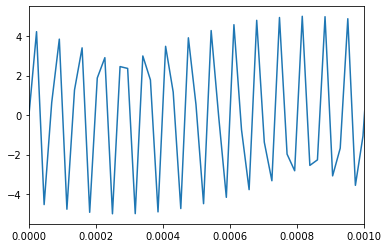

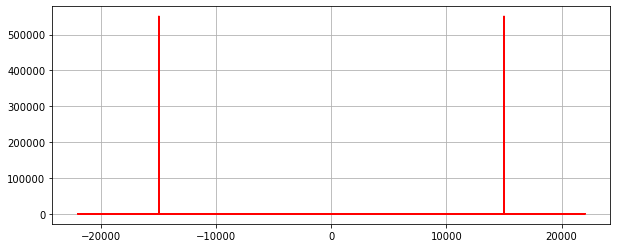

In [3]:
def sinw(A,theta,f0):
    #pour voir le signal en temporel
    x1 = A*sin(2*np.pi*f0*t-theta)
    return x1

def graphSig(t,x):
    figure(0)
    fig0=plot(t,x,label="coucou")
    fig0=px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.001])
    fig0.show
    
    
def fftcalc(x):
    #calcul de la transformée de Fourrier discrète
    echantillons = x
    tfd = fft(echantillons)
    N=len(echantillons)
    spectre = np.absolute(tfd)**(2)/N
    freq=np.fft.fftfreq(len(spectre),1/Te)
    fig2=figure(figsize=(10,4))
    plot(freq,spectre,'r')
    #xlabel('f')#ylabel('A')axis([-0.1,fe,0,spectre.max()])
    grid()
    fig2.show

def audioSin(A1, theta1,f01):
    x1 = A1*sin(2*np.pi*f01*t-theta1)
    audio=Audio(x1,rate=Te)
    return audio
    

signal_sin=sinw(A,theta,f0)
signal_sin_plot=graphSig(t,signal_sin)
signal_fft=fftcalc(signal_sin)
audioSin(A, theta,f0)

## Signal dent de scie

* Signal dent de scie $ds(t)$ de fréquence f0 synthetisé à la fréquence d'échantillonnage $\nu_e$.

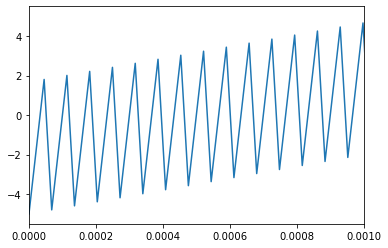

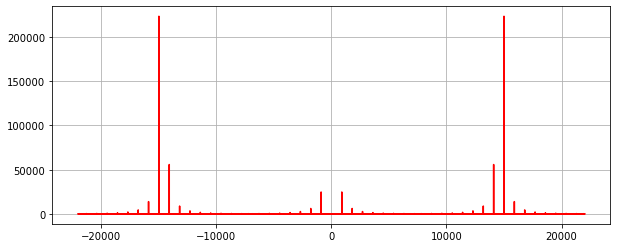

In [4]:
def sawTooth(A,theta,f0):
    ds=A*signal.sawtooth(2 * np.pi * (f0) * t-theta)
    return ds

def graphSig2(t,x):
    figure(1)
    fig0=plot(t,x,label="coucou")
    fig0=px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.001])
    fig0.show

def audioTooth(A,theta,f0):
    ds2=A*signal.sawtooth(2 * np.pi * (f0) * t-theta)
    audiotooth=Audio(ds2,rate=Te)
    return audiotooth

signal_tooth=sawTooth(A,theta,f0)
signal_tooth_plot=graphSig2(t,signal_tooth)
signal_tooth_fft=fftcalc(signal_tooth)
audioTooth(A, theta,f0)

## Signal carré

* Signal carré $sq(t)$ de fréquence f0 synthetisé à la fréquence d'échantillonnage $\nu_e$.

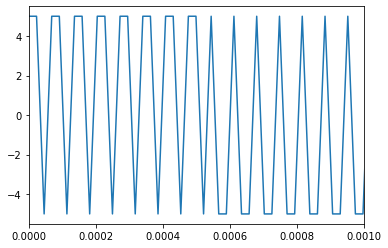

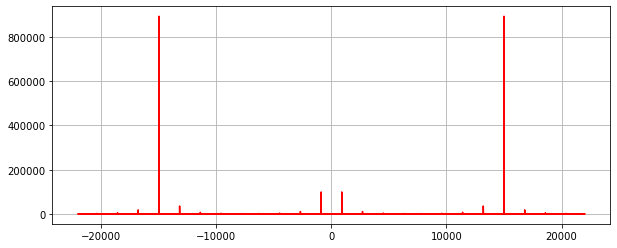

In [5]:
def square(A,theta,f0):
    sq=A*signal.square(2 * np.pi * (f0) * t-theta)
    return sq

def graphSig3(t,x):
    figure(2)
    fig0=plot(t,x,label="coucou")
    fig0=px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.001])
    fig0.show

def audioSquare(A,theta,f0):
    sq2=A*signal.square(2 * np.pi * (f0) * t-theta)
    audiosquare=Audio(sq2,rate=Te)
    return audiosquare

signal_square=square(A,theta,f0)
signal_square_plot=graphSig3(t,signal_square)
signal_square_fft=fftcalc(signal_square)
audioSquare(A, theta,f0)

## Signal dent de scie sans sawtooth

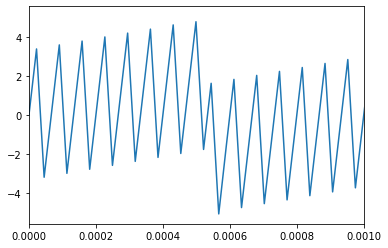

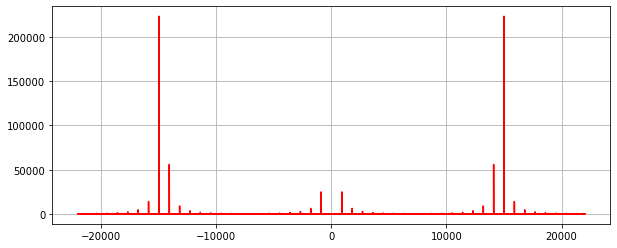

In [6]:
def dentScie(A,theta,f0):
    ds=0
    sawt=0
    for k in range(1,1000):
        ds=A*(2/np.pi)*((-1)**(k+1))*(np.sin(2*np.pi*k*f0*t-theta)/k)
        k=k+1
        sawt=sawt+ds
    return sawt

def graphSig4(t,x):
    figure(4)
    fig0=plot(t,x,label="coucou")
    fig0=px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.001])
    fig0.show
    
def audioScie(A,theta,f0):
    ds=0
    sawt=0
    for k in range(1,1000):
        ds=A*(2/np.pi)*((-1)**(k+1))*(np.sin(2*np.pi*k*f0*t-theta)/k)
        k=k+1
        sawt=sawt+ds
    audioTooth2=Audio(sawt,rate=Te)
    return audioTooth2
    
signal_scie = dentScie(A,theta,f0)
signal_scie_plot=graphSig4(t,signal_scie)
signal_scie_fft=fftcalc(signal_scie)

audioScie(A,theta,f0)

## Signal carré sans square

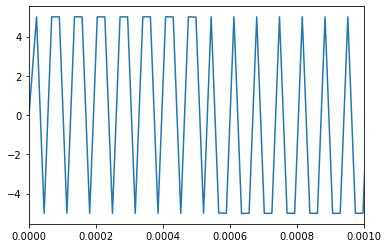

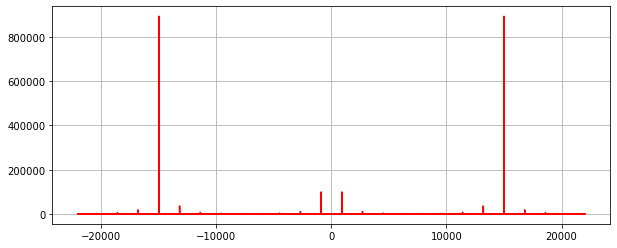

In [7]:
def carre(A,theta,f0):
    sq=0
    carr=0
    for k in range(1,1000):
        sq=A*(4/np.pi)*(np.sin((2*k-1)*2*np.pi*f0*t-theta)/(2*k-1))
        k=k+1
        carr=carr+sq
    return carr

def graphSig5(t,x):
    figure(5)
    fig0=plot(t,x,label="coucou")
    fig0=px.line(t,x,labels={'x':'t', 'y':'s(t)'})
    xlim([0,0.001])
    fig0.show

def audioCarre(A,theta,f0):
    sq=0
    carr=0
    for k in range(1,1000):
        sq=A*(4/np.pi)*(np.sin((2*k-1)*2*np.pi*f0*t-theta)/(2*k-1))
        k=k+1
        carr=carr+sq
    audioCarr=Audio(carr,rate=Te)
    return audioCarr
    
signal_carre = carre(A,theta,f0)
signal_carre_plot=graphSig5(t,signal_carre)
signal_carre_fft=fftcalc(signal_carre)

audioCarre(A,theta,f0)

### documentation lfilter https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

## Réalisation de filtre

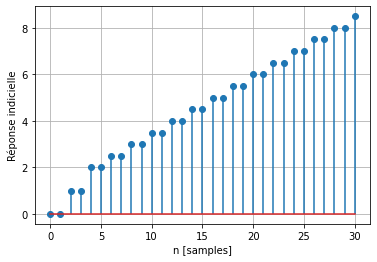

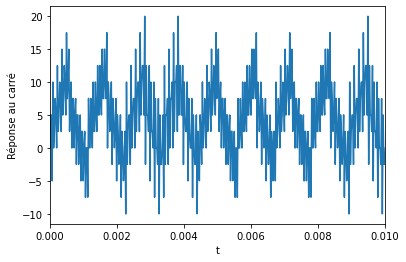

In [8]:
def filterA():
    b=[0,1,0,0,0,-0.5]
    a=[1,0,-1]
    filterY = signal.lfilter(b, a, x=signal_carre, axis=- 1, zi=None)
    return filterY

def audioCarre2(A,theta,f0):
    b=[0,1,0,0,0,-0.5]
    a=[1,0,-1]
    filterY = signal.lfilter(b, a, x=signal_carre, axis=- 1, zi=None)
    audioCarr=Audio(filterY,rate=Te)
    return audioCarr


b=[0,1,0,0,0,-0.5]
a=[1,0,-1]
#réponse indicielle
n = arange(31)
step = 1.0*(n>0)
h = signal.lfilter(b,a,step)

figure(0)
stem(n, h)
grid()
xlabel('n [samples]')
ylabel('Réponse indicielle')

sigfilt=filterA()
figure(1)
plot(t,sigfilt)
xlim([0,0.01])
xlabel('t')
ylabel('Réponse au carré')

audioCarre2(A,theta,f0)

## calcul de coef pour filtre de Butterworth

In [9]:
def nButter(amax,aMin,fmax,fMin):
    TMin=10**(-aMin/20)
    Tmax=10**(-amax/20)
    epsilon= math.sqrt((1/(TMin**2))-1)
    nb=math.log((1/Tmax**2)-1/(epsilon)**2)/2*math.log(fmax/fMin)
    return nb

objet= nButter(70,0.5,30,10)
print(objet)

objet2= nButter(70,0.5,10,5)
print(objet2)
    

8.853768525852386
5.586105994194772


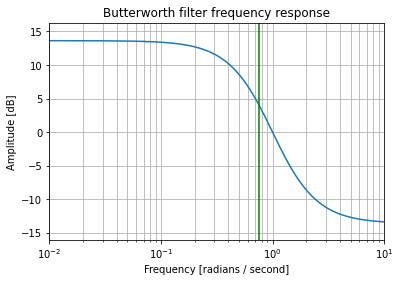

In [21]:
####butter test
fs=0.75
b, a = signal.butter(6, fs, 'low')
w, h = signal.freqs(b, a)
semilogx(w, 20 * np.log10(abs(h)))
title('Butterworth filter frequency response')
xlabel('Frequency [radians / second]')
ylabel('Amplitude [dB]')
margins(0, 0.1)
grid(which='both', axis='both')
axvline(fs, color='green') # cutoff frequency
show()

TypeError: 'list' object is not callable

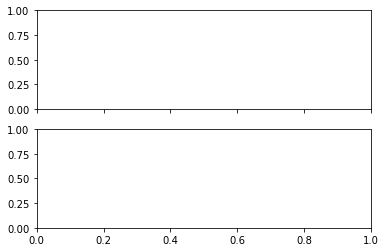

In [40]:
fig, (ax1, ax2) = subplots(2, 1, sharex=True)


b, a = signal.butter(6, fs, 'low')
filtered = signal.lfilter(b,a, signal_square)
plot(filtered, 'r', label='TF')
show()